Q learning is a model-free value based algorithm.

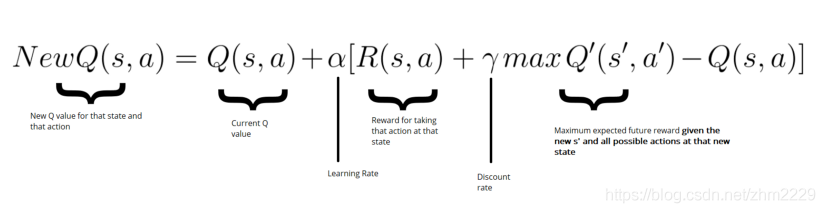

In [87]:
from PIL import Image
image = Image.open('img/qLearning/qLearning_1.png')
image

## Game: Mountain Car

https://www.gymlibrary.dev/environments/classic_control/mountain_car/

In [1]:
import gym
env = gym.make("MountainCar-v0")
env.reset(seed=42)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


array([-0.4452088,  0.       ], dtype=float32)

In [89]:
import numpy as np
done=False
status_action_reward=[]

for _ in range(100000):
    action=np.random.choice([0,0,2,2,2]) #action 0 go left, 1 do nothing, 2 go right
    status_position_velocity, reward, truncated, a= env.step(action)
    env.render()
    status_action_reward.append([status_position_velocity, action, reward])
    if reward!=-1:
        print(status_position_velocity, reward, truncated, a)
env.close()

KeyboardInterrupt: 

In [90]:
status_action_reward[-1:]

[[array([0.6       , 0.06956801], dtype=float32), 0, -1.0]]

### Observation Space

The observation is a ndarray with shape (2,) where the elements correspond to the following:

In [ ]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [ ]:
env.observation_space.high #the upper bound of the position and velocity

array([0.6 , 0.07], dtype=float32)

In [ ]:
env.observation_space.low #the lower bound of the position and velocity

array([-1.2 , -0.07], dtype=float32)

### Action Space
There are 3 discrete deterministic actions:

In [ ]:
env.action_space

Discrete(3)

### Transition Dynamics

Given an action, the mountain car follows the following transition dynamics:

* positiont+1 = positiont + velocityt+1
* velocityt+1 = velocityt + (action - 1) * force - cos(3 * positiont) * gravity


### Starting State
* The position of the car is assigned a uniform random value in [-0.6 , -0.4]. 
* The starting velocity of the car is always assigned to 0.

In [ ]:
env.reset()

array([-0.5122243,  0.       ], dtype=float32)